<a href="https://colab.research.google.com/github/ThuHuong-Gina/Credit-Score-Prediction_Project/blob/main/Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Học Viện Ngân Hàng
## <center> Môn học: Ứng dụng trí tuệ nhân tạo trong kinh doanh
## <center> Đề tài: Ứng dụng Ai và chấm điểm tín dụng
## <center> Nhóm: 10
## <center> Năm học: 2020 - 2021




# 1 Mô tả bài toán

Gọi $X$ là tập dữ liệu gồm thuộc tính về 45 khách hàng cần chấm điểm tín dụng. Gọi $P$ là xác suất để chấm điểm khách hàng $(P \in [0,1])$. Ta gọi là $f: X \rightarrow P$ là hàm xác định xác suất khả năng được cho vay vốn của khách hàng. Mục tiêu của bài toán là cần tính toán $f(x_i,) \in [0,1],\forall i = 1,...45$

## Dữ liệu
Tập dữ liệu do nhóm thu thập được
- Số lượng bản ghi (khách hàng): 45. Trong đó: Số bản ghi trong tập huấn luyện: 30, số bản ghi trong tập thử nghiệm: 15
- Số lượng thuộc tính: 13 (12 biến độc lập + 1 biến phụ thuộc)

Cụ thể:
- RiskOfCustomer: Biến phụ thuộc (mục tiêu dự đoán), dự đoán tình trạng rủi ro của khách hàng (0 - Không cho vay, 1 - Rủi ro rất cao, 2 - Tiềm tàng rủi ro, 3 - Tương đối an toàn, 4 - Rất an toàn).
- DebtStatus: Tình hình trả nợ của khách hàng.
- MonthlyIncome: Tình hình thu nhập hàng tháng của khách hàng.
- PropertyWorth: Giá trị tài sản đảm bảo.
- DebtAtTime: Khoản nợ hiện có của khách hàng.
- LoanTime: Thời gian vay nợ của khách hàng.
- CycleOfPayment: Chu kì trả nợ của khách hàng.
- Saving: Tài khoản tiết kiệm của khách hàng.
- AmountOfLoan: Khoản vay mong muốn của khách hàng.
- Age: Tuổi của khách hàng.
- Educational: Trình độ học vấn của khách hàng.
- WorkStatus: Tính chất công việc của khách hàng.
- YearOfWork: Thâm niên làm việc của khách hàng.

### Thuật toán xếp hạng tín dụng: Random Forest
Đây là phương pháp xây dựng một tập hợp rất nhiều cây quyết định và sử dụng phương pháp voting để đưa ra quyết định về biến mục tiêu cần được dự báo.

# 2 Phân tích dữ liệu

## 2.1 Đọc dữ liệu

In [ ]:
# Tải các thư viện cần thiết
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
sns.set(style='dark', context='notebook', palette='deep')
pd.options.display.max_columns = 200

In [ ]:
from google.colab import drive
drive.mount("Huong",force_remount=True)
# drive.mount('/content/drive')

Mounted at Tuân


In [ ]:
train = pd.read_csv("Huong/My Drive/Code Python/train.csv")
test = pd.read_csv("Huong/My Drive/Code Python/test.csv")
# train = pd.read_csv("drive/MyDrive/Code Python/train.csv")
# test = pd.read_csv("drive/MyDrive/Code Python/test.csv")
train.head(20)
test.head(20)

,STT,Name,RiskOfCustomer,DebtStatus,MonthlyIncome,PropertyWorth,DebtAtTime,LoanTime,CycleOfPayment,Saving,AmountOfLoan,Age,Educational,WorkStatus,YearOfWork
0,1,Tran Thanh Thai,4,0,15,600,0,20,6,400,500,30,4,3,2
1,2,Nguyen Xuan Toan,2,2,14,700,10,12,6,200,600,24,1,1,3
2,3,Bui Thi Nguyet,3,2,20,200,0,24,12,300,100,25,2,3,1
3,4,Nguyen Van Huan,1,0,22,340,0,12,6,100,200,22,4,2,2
4,5,Nguyen Nhu Quynh,0,0,23,500,20,36,12,200,400,23,2,3,1
5,6,Nguyen Hong Van,0,1,14,200,30,12,24,100,200,26,4,2,2
6,7,Nguyen Hai Dang,2,2,15,300,0,24,6,200,200,30,2,3,1
7,8,Nguyen Duc Thao,2,2,16,400,0,6,6,100,300,32,4,3,1
8,9,Nguyen Phuoc Anh,4,0,17,500,12,12,12,50,400,30,2,1,4
9,10,Nguyen Quoc Luan,1,3,23,600,0,24,6,100,500,32,1,1,2


In [ ]:
train.describe()

,STT,RiskOfCustomer,DebtStatus,MonthlyIncome,PropertyWorth,DebtAtTime,LoanTime,CycleOfPayment,Saving,AmountOfLoan,Age,Educational,WorkStatus,YearOfWork
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,1.666667,0.900000,21.933333,1152.333333,54.766667,10.700000,3.766667,107.833333,627.333333,37.333333,1.833333,1.666667,4.466667
std,8.803408,1.446359,0.994814,12.359370,1673.986947,128.889068,7.507008,3.339248,146.010175,959.705175,8.470368,1.341212,1.093345,2.515241
min,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,1.000000,0.000000,50.000000,24.000000,0.000000,0.000000,0.000000
25%,8.250000,0.250000,0.000000,15.000000,400.000000,0.000000,5.250000,1.000000,32.750000,200.000000,30.250000,1.000000,1.000000,3.000000
50%,15.500000,1.000000,1.000000,19.500000,575.000000,4.500000,8.000000,3.000000,65.000000,350.000000,37.000000,1.500000,2.000000,4.000000
75%,22.750000,3.000000,2.000000,23.750000,1000.000000,23.750000,12.000000,6.000000,91.750000,500.000000,44.750000,3.000000,2.000000,5.750000
max,30.000000,4.000000,3.000000,55.000000,7000.000000,600.000000,30.000000,12.000000,570.000000,4000.000000,51.000000,4.000000,4.000000,11.000000


In [ ]:
#Mô tả dữ liệu
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STT             30 non-null     int64 
 1   Name            30 non-null     object
 2   RiskOfCustomer  30 non-null     int64 
 3   DebtStatus      30 non-null     int64 
 4   MonthlyIncome   30 non-null     int64 
 5   PropertyWorth   30 non-null     int64 
 6   DebtAtTime      30 non-null     int64 
 7   LoanTime        30 non-null     int64 
 8   CycleOfPayment  30 non-null     int64 
 9   Saving          30 non-null     int64 
 10  AmountOfLoan    30 non-null     int64 
 11  Age             30 non-null     int64 
 12  Educational     30 non-null     int64 
 13  WorkStatus      30 non-null     int64 
 14  YearOfWork      30 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 3.6+ KB


In [ ]:
#Thống kê dữ liệu khuyết thiếu ở tập huấn luyện
train.isnull().sum()

STT               0
Name              0
RiskOfCustomer    0
DebtStatus        0
MonthlyIncome     0
PropertyWorth     0
DebtAtTime        0
LoanTime          0
CycleOfPayment    0
Saving            0
AmountOfLoan      0
Age               0
Educational       0
WorkStatus        0
YearOfWork        0
dtype: int64

In [ ]:
#Thống kê dữ liệu khuyết thiếu ở tập thử nghiệm
test.isnull().sum()

STT               0
Name              0
RiskOfCustomer    0
DebtStatus        0
MonthlyIncome     0
PropertyWorth     0
DebtAtTime        0
LoanTime          0
CycleOfPayment    0
Saving            0
AmountOfLoan      0
Age               0
Educational       0
WorkStatus        0
YearOfWork        0
dtype: int64

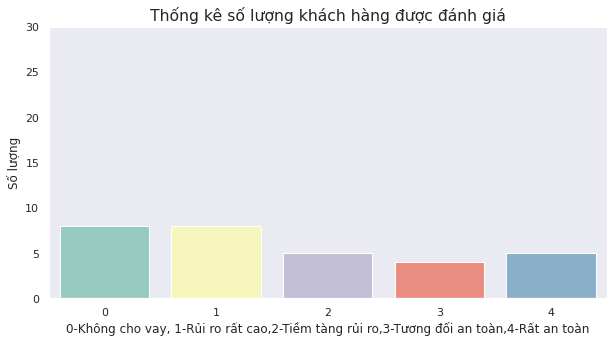

In [ ]:
#Vẽ biểu đồ thống kê số lượng khách hàng được/không được cho vay
ax = sns.countplot(x = train.RiskOfCustomer ,palette="Set3")
sns.set(font_scale=1.3)
ax.set_ylim(top = 30)
ax.set_title('Thống kê số lượng khách hàng được đánh giá')
ax.set_xlabel('0-Không cho vay, 1-Rủi ro rất cao,2-Tiềm tàng rủi ro,3-Tương đối an toàn,4-Rất an toàn')
ax.set_ylabel('Số lượng')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(train,2,["MonthlyIncome",
                                            "PropertyWorth",
                                            "DebtAtTime",
                                            "LoanTime",
                                            "Saving",
                                            "AmountOfLoan",
                                            "Age",
                                            "Educational",
                                            "WorkStatus",
                                            "YearOfWork"])

In [ ]:
#Hiển thị outliers
train.loc[Outliers_to_drop]

,STT,Name,RiskOfCustomer,DebtStatus,MonthlyIncome,PropertyWorth,DebtAtTime,LoanTime,CycleOfPayment,Saving,AmountOfLoan,Age,Educational,WorkStatus,YearOfWork
14,15,Le Tuyet Hang,0,2,55,7000,100,24,6,570,4000,41,0,0,11
15,16,Pham Van Quang,0,1,20,2000,20,24,6,500,1200,36,1,0,2
25,26,Dinh Tien,4,3,27,7000,100,26,12,134,4000,44,0,0,5
19,20,Quoc Dung,4,0,20,500,0,30,3,500,1100,37,0,0,3


In [ ]:
#Loại bỏ các outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

##2.2 Hợp nhất tập huấn luyện và thử nghiệm

In [ ]:
train_len= len(train)
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [ ]:
dataset.shape

(41, 15)

##2.3 Phân tích các biến

###2.3.1 Ma trận tương quan (Correlation matrix)

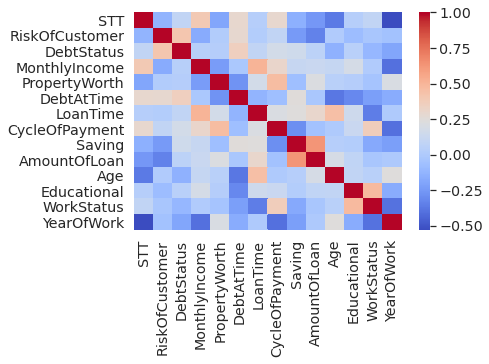

In [ ]:
# Ma trận tương quan - Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

###2.3.2 Biến DebtStatus

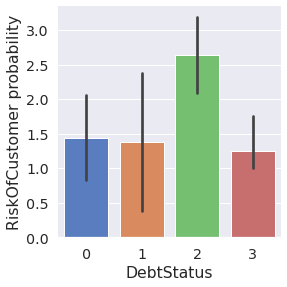

In [ ]:
# Explore DebtStatus feature vs RiskOfCustomer
g  = sns.factorplot(x="DebtStatus", y="RiskOfCustomer",data=dataset,kind="bar", size = 4 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.3 Biến Age

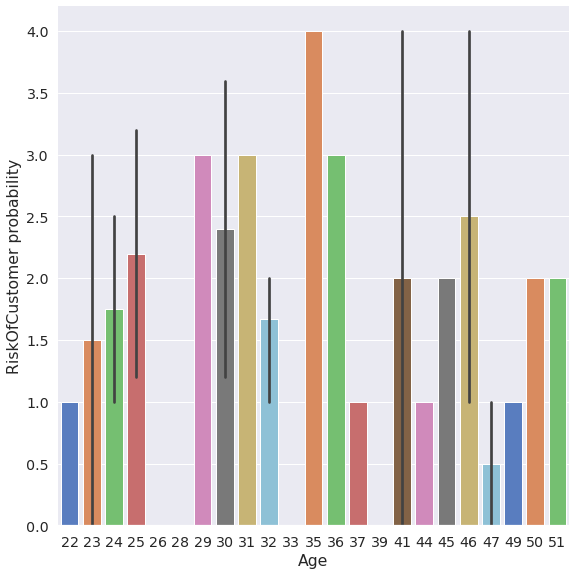

In [ ]:
# Explore Age feature vs RiskOfCustomer
g  = sns.factorplot(x="Age", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.Age[i] >= 36 and dataset.Age[i] <= 55:
    if dataset.Age[i] in range(36, 56):
        dataset.Age[i] = 0
    # elif dataset.Age[i] >= 26 and dataset.Age[i] <= 35:
    elif dataset.Age[i] in range(26, 36):
        dataset.Age[i] = 1
    # if dataset.Age[i] >= 56 and dataset.Age[i] <= 60:
    elif dataset.Age[i] in range(56, 61):
        dataset.Age[i] = 2
    # if dataset.Age[i] >= 20 and dataset.Age[i] <= 25:
    elif dataset.Age[i] in range(20, 26):
        dataset.Age[i] = 3
    #if dataset.Age[i] >=18 and dataset.Age[i] <= 20 or dataset.Age[i] >=61:
    elif dataset.Age[i] in range(18, 20) or dataset.Age[i] >= 61:
        dataset.Age[i] = 4

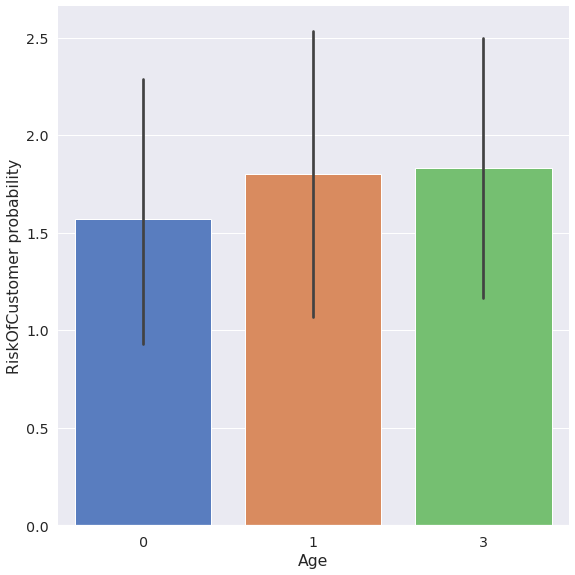

In [ ]:
# Explore Age feature vs RiskOfCustomer
g  = sns.factorplot(x="Age", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.4 Biến PropertyWorth

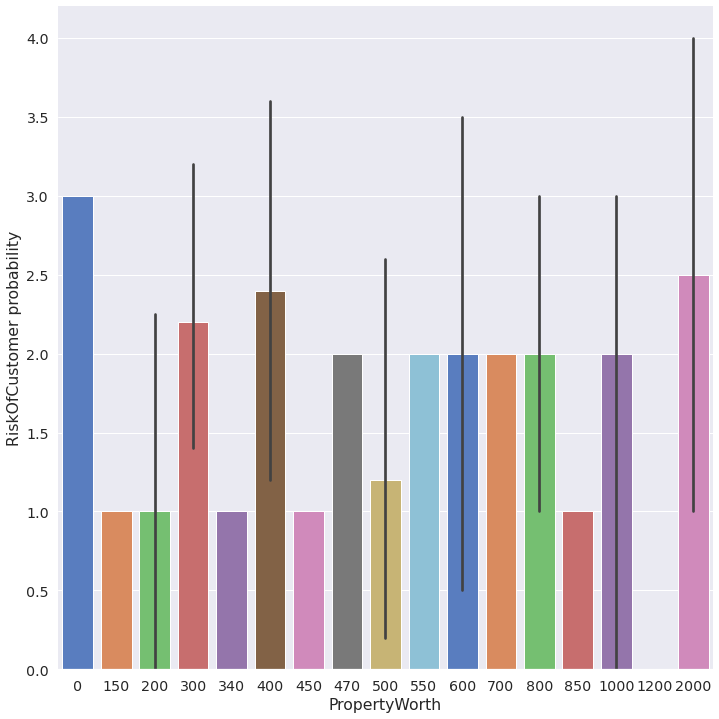

In [ ]:
# Explore PropertyWorth feature vs RiskOfCustomer
g  = sns.factorplot(x="PropertyWorth", y="RiskOfCustomer",data=dataset,kind="bar", size = 10 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.PropertyWorth[i] >= 700:
      if dataset.PropertyWorth[i] >= 700:
          dataset.PropertyWorth[i] = 0
    # if dataset.PropertyWorth[i] >= 500 <= 700:
      elif dataset.PropertyWorth[i] in range(500, 700):
            dataset.PropertyWorth[i] = 1
    # if dataset.PropertyWorth[i] >= 300 <= 500:
      elif dataset.PropertyWorth[i] in range(300, 500):
            dataset.PropertyWorth[i] = 2
    # if dataset.PropertyWorth[i] >= 100 <= 300:
      elif dataset.PropertyWorth[i] in range(100, 300):
        dataset.PropertyWorth[i] = 3
    # if dataset.PropertyWorth[i] <=100:
      elif dataset.PropertyWorth[i] <= 100:
        dataset.PropertyWorth[i] = 4

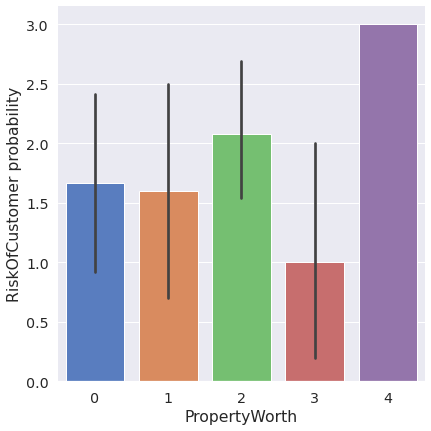

In [ ]:
# Explore PropertyWorth feature vs RiskOfCustomer
g  = sns.factorplot(x="PropertyWorth", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.5 Biến DebtAtTime

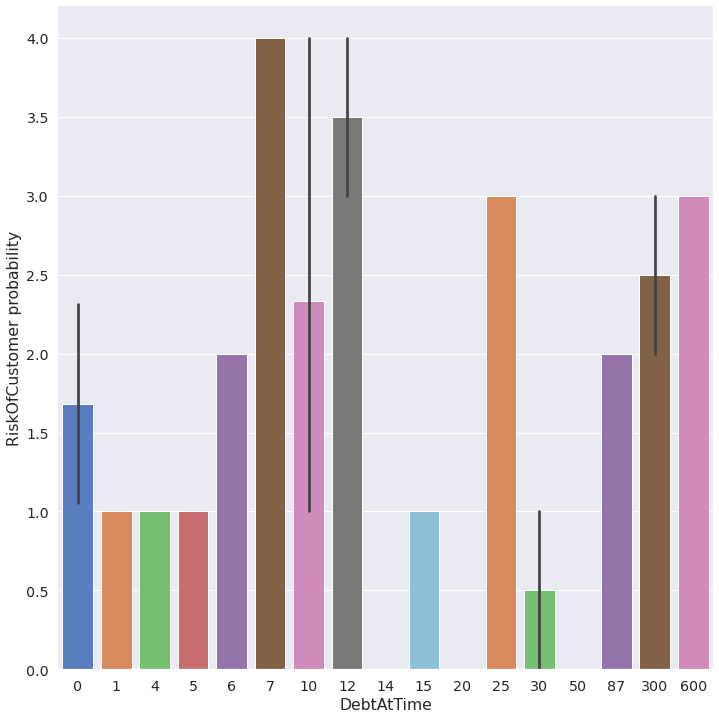

In [ ]:
# Explore DebtAtTime feature vs RiskOfCustomer
g  = sns.factorplot(x="DebtAtTime", y="RiskOfCustomer",data=dataset,kind="bar", size = 10 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.DebtAtTime[i] <= 10:
      if dataset.DebtAtTime[i] <= 10:
        dataset.DebtAtTime[i] = 0
    # if dataset.DebtAtTime[i] >= 11 <= 30:
      elif dataset.DebtAtTime[i] in range(11, 30):
        dataset.DebtAtTime[i] = 1
    # if dataset.DebtAtTime[i] >= 31 <= 70:
      elif dataset.DebtAtTime[i] in range(30, 70):
        dataset.DebtAtTime[i] = 2
    # if dataset.DebtAtTime[i] >= 71 <= 100:
      elif dataset.DebtAtTime[i] in range(70, 100):
        dataset.DebtAtTime[i] = 3
    # if dataset.DebtAtTime[i] >= 100:
      elif dataset.DebtAtTime[i] >= 100:
        dataset.DebtAtTime[i] = 4

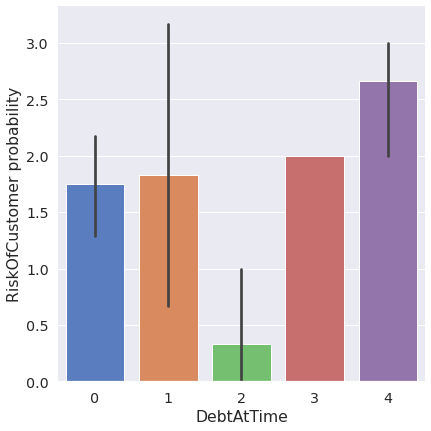

In [ ]:
# Explore DebtAtTime feature vs RiskOfCustomer
g  = sns.factorplot(x="DebtAtTime", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.6 Biến LoanTime

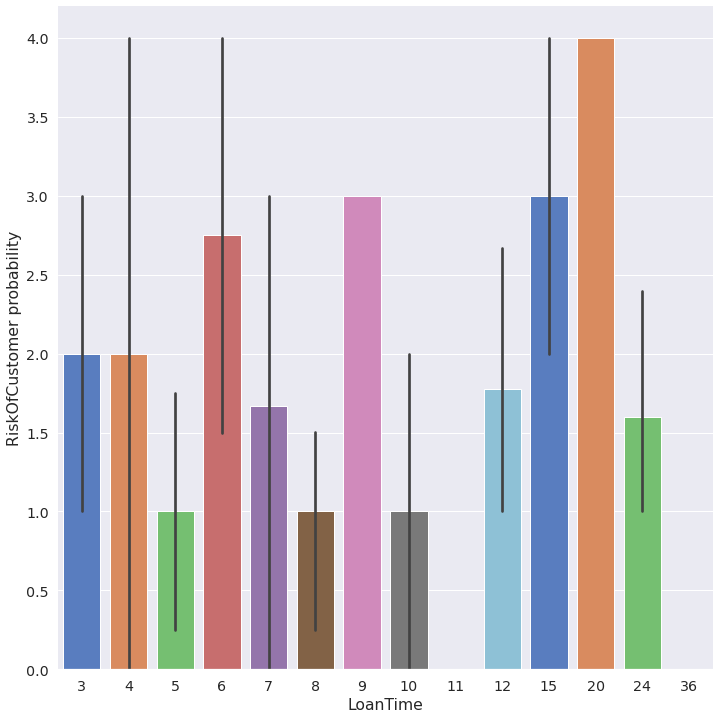

In [ ]:
# Explore LoanTime feature vs RiskOfCustomer
g  = sns.factorplot(x="LoanTime", y="RiskOfCustomer",data=dataset,kind="bar", size = 10 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.LoanTime[i] <= 3:
      if dataset.LoanTime[i] <= 3:
        dataset.LoanTime[i] = 0
    # if dataset.LoanTime[i] >= 4 <= 6:
      elif dataset.LoanTime[i] in range(4, 6):
        dataset.LoanTime[i] = 1
    # if dataset.LoanTime[i] >= 7 <= 12:
      elif dataset.LoanTime[i] in range(6, 12):
        dataset.LoanTime[i] = 2
    # if dataset.LoanTime[i] >= 12 <= 24:
      elif dataset.LoanTime[i] in range(12, 24):
        dataset.LoanTime[i] = 3
    # if dataset.LoanTime[i] >= 24:
      elif dataset.LoanTime[i] >= 24:
        dataset.LoanTime[i] = 4

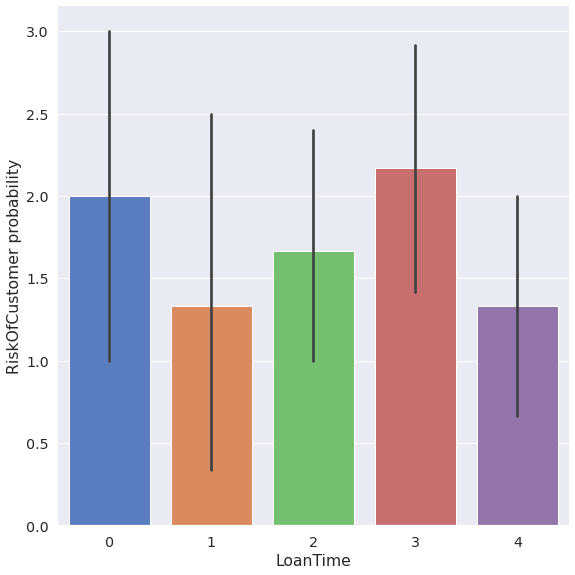

In [ ]:
# Explore LoanTime feature vs RiskOfCustomer
g  = sns.factorplot(x="LoanTime", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.7 Biến CycleOfPayment

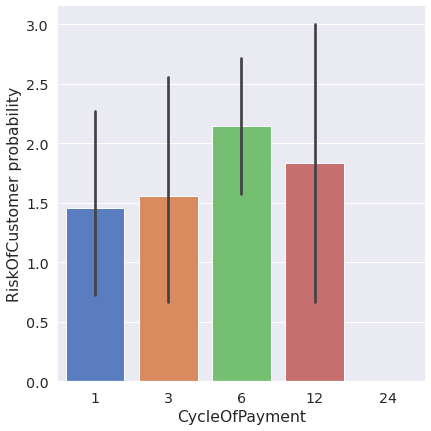

In [ ]:
# Explore CycleOfPayment feature vs RiskOfCustomer
g  = sns.factorplot(x="CycleOfPayment", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.CycleOfPayment[i] = 0:
      if dataset.CycleOfPayment[i] < 1:
        dataset.CycleOfPayment[i] = 0
    # if dataset.CycleOfPayment[i] = 1:
      elif dataset.CycleOfPayment[i] in range(1, 2):
        dataset.CycleOfPayment[i] = 1
    # if dataset.CycleOfPayment[i] = 3:
      elif dataset.CycleOfPayment[i] in range (3, 5):
        dataset.CycleOfPayment[i] = 2
    # if dataset.CycleOfPayment[i] = 6:
      elif dataset.CycleOfPayment[i] in range (6, 11):
        dataset.CycleOfPayment[i] = 3
    # if dataset.CycleOfPayment[i] >= 12
      elif dataset.CycleOfPayment[i] >= 12:
        dataset.CycleOfPayment[i] = 4

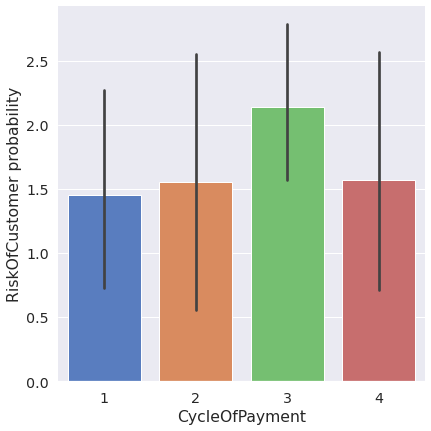

In [ ]:
# Explore CycleOfPayment feature vs RiskOfCustomer
g  = sns.factorplot(x="CycleOfPayment", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.8 Biến Saving

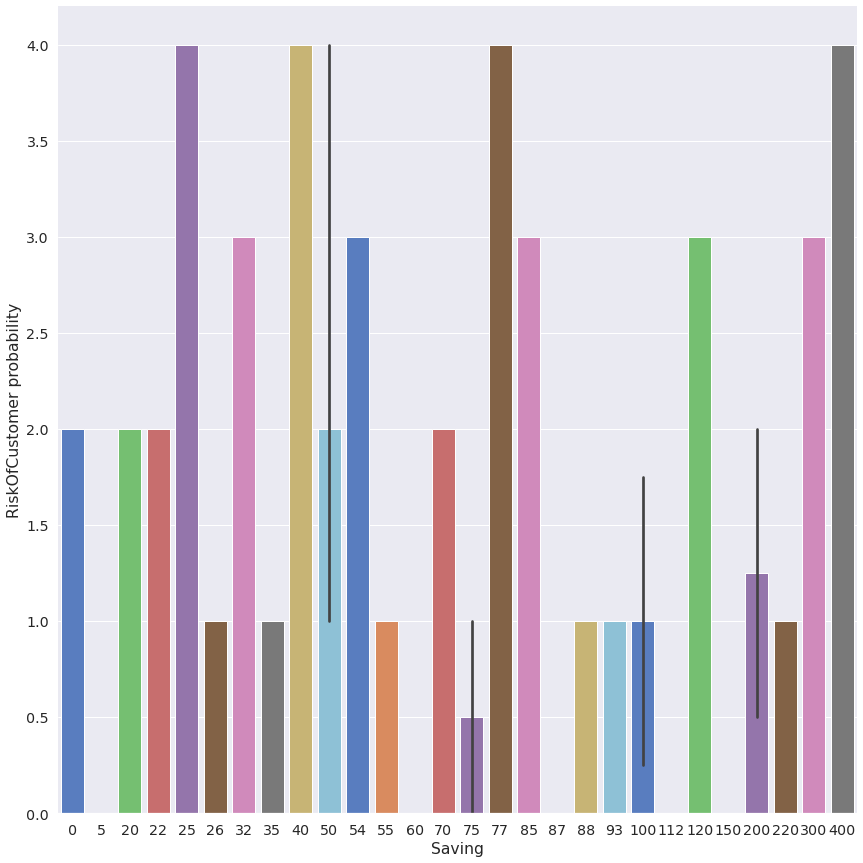

In [ ]:
# Explore Saving feature vs RiskOfCustomer
g  = sns.factorplot(x="Saving", y="RiskOfCustomer",data=dataset,kind="bar", size = 12 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.Saving[i] >= 500:
      if dataset.Saving[i] >= 500:
        dataset.Saving[i] = 0
    # if dataset.Saving[i] >= 300 <= 500:
      elif dataset.Saving[i] in range(300, 500):
        dataset.Saving[i] = 1
    # if dataset.Saving[i] >= 100 <= 300:
      elif dataset.Saving[i] in range(100, 300):
        dataset.Saving[i] = 2
    # if dataset.Saving[i] >= 50 <= 99:
      elif dataset.Saving[i] in range(50, 100):
        dataset.Saving[i] = 3
    # if dataset.Saving[i] <= 50:
      elif dataset.Saving[i] <= 50:
        dataset.Saving[i] = 4

In [ ]:
# Explore Saving feature vs RiskOfCustomer
g  = sns.factorplot(x="Saving", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

ValueError: ignored

###2.3.9 Biến Educational

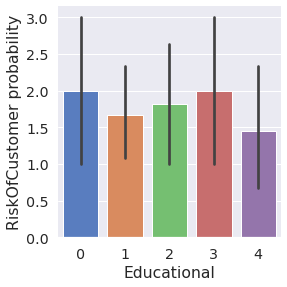

In [ ]:
# Explore Educational feature vs RiskOfCustomer
g  = sns.factorplot(x="Educational", y="RiskOfCustomer",data=dataset,kind="bar", size = 4 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.10 Biến WorkStatus

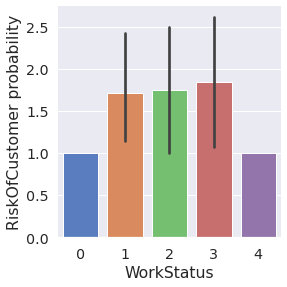

In [ ]:
# Explore WorkStatus feature vs RiskOfCustomer
g  = sns.factorplot(x="WorkStatus", y="RiskOfCustomer",data=dataset,kind="bar", size = 4 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.11 Biến YearOfWork

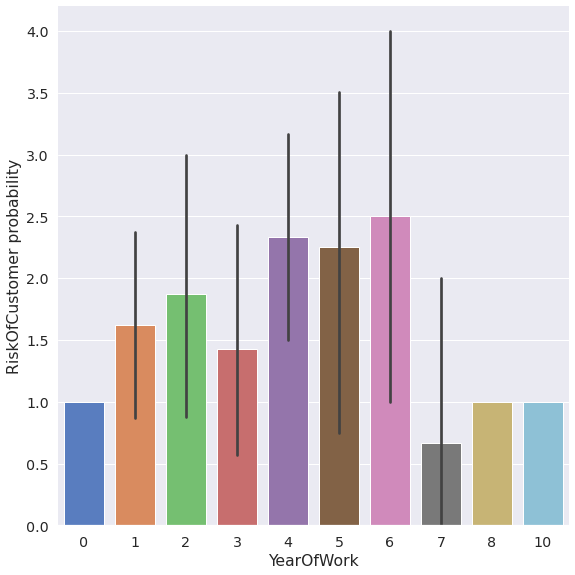

In [ ]:
# Explore YearOfWork feature vs RiskOfCustomer
g  = sns.factorplot(x="YearOfWork", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.YearOfWork[i] >= 7:
      if dataset.YearOfWork[i] >= 7:
        dataset.YearOfWork[i] = 0
    # if dataset.YearOfWork[i] >= 5 <= 7:
      elif dataset.YearOfWork[i] in range(5, 7):
        dataset.YearOfWork[i] = 1
    # if dataset.YearOfWork[i] >= 3 <= 5:
      elif dataset.YearOfWork[i] in range(3, 5):
        dataset.YearOfWork[i] = 2
    # if dataset.YearOfWork[i] >= 1 <= 3:
      elif dataset.YearOfWork[i] in range(1, 3):
        dataset.YearOfWork[i] = 3
    # if dataset.YearOfWork[i] < 1:
      elif dataset.YearOfWork[i] <= 1:
        dataset.YearOfWork[i] = 4

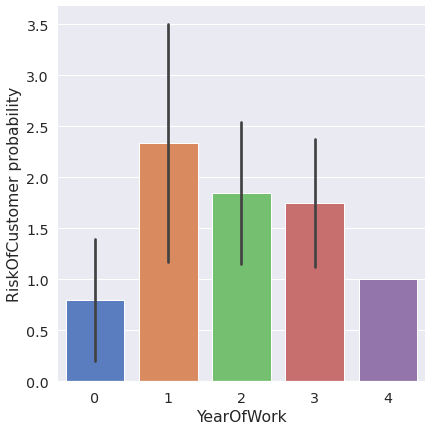

In [ ]:
# Explore YearOfWork feature vs RiskOfCustomer
g  = sns.factorplot(x="YearOfWork", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.12 Biến MonthlyIncome

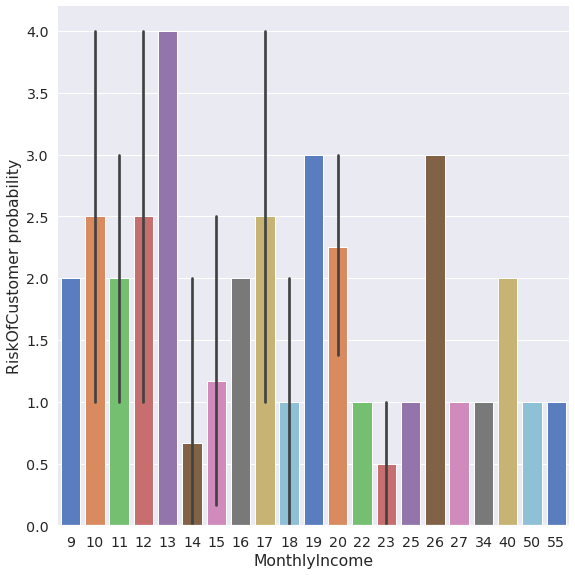

In [ ]:
# Explore MonthlyIncome feature vs RiskOfCustomer
g  = sns.factorplot(x="MonthlyIncome", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.MonthlyIncome[i] >= 70:
      if dataset.MonthlyIncome[i] >= 70:
        dataset.MonthlyIncome[i] = 0
    # if dataset.MonthlyIncome[i] >= 50 <= 70:
      elif dataset.MonthlyIncome[i] in range(50, 70):
        dataset.MonthlyIncome[i] = 1
    # if dataset.MonthlyIncome[i] >= 20 <= 50:
      elif dataset.MonthlyIncome[i] in range(20, 50):
        dataset.MonthlyIncome[i] = 2
    # if dataset.MonthlyIncome[i] >= 10 <= 20:
      elif dataset.MonthlyIncome[i] in range(10, 20):
        dataset.MonthlyIncome[i] = 3
    # if dataset.MonthlyIncome[i] <= 10:
      elif dataset.MonthlyIncome[i] <= 10:
        dataset.MonthlyIncome[i] = 4

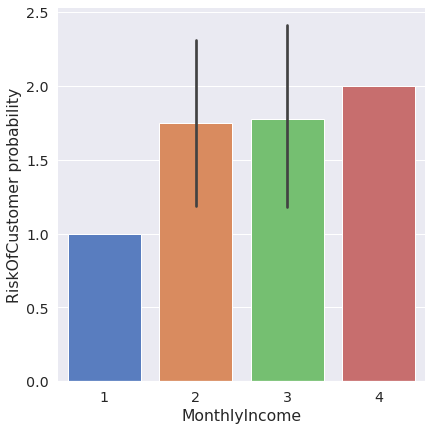

In [ ]:
# Explore MonthlyIncome feature vs RiskOfCustomer
g  = sns.factorplot(x="MonthlyIncome", y="RiskOfCustomer",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

###2.3.13 Biến AmountOfLoan

In [ ]:
dataset.AmountOfLoan.isnull().sum()

0

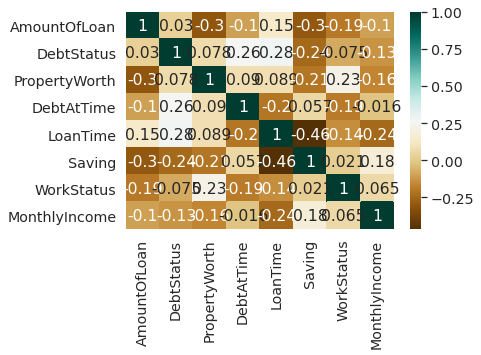

In [ ]:
g = sns.heatmap(dataset[["AmountOfLoan","DebtStatus","PropertyWorth","DebtAtTime","LoanTime","Saving","WorkStatus","MonthlyIncome"]].corr(),cmap="BrBG",annot=True)

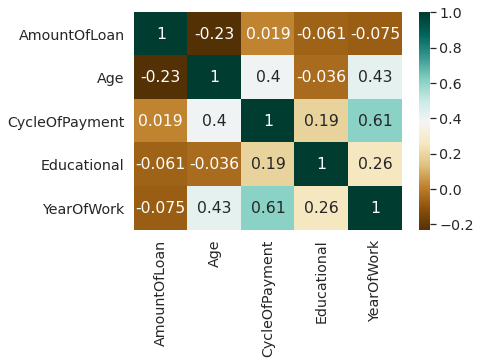

In [ ]:
g = sns.heatmap(dataset[["AmountOfLoan","Age","CycleOfPayment","Educational","YearOfWork"]].corr(),cmap="BrBG",annot=True)

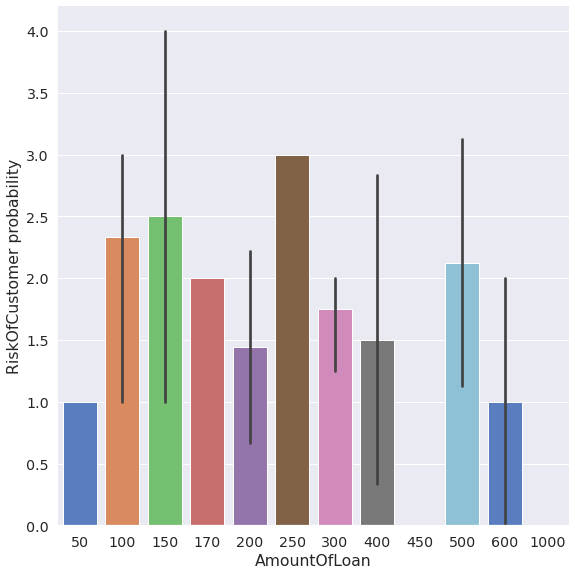

In [ ]:
# Explore AmountOfLoan feature vs RiskOfCustomer
g  = sns.factorplot(x="AmountOfLoan", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

In [ ]:
for i in range(len(dataset)):
    # if dataset.AmountOfLoan[i] < 100:
      if dataset.AmountOfLoan[i] <= 100:
        dataset.AmountOfLoan[i] = 0
    # if dataset.AmountOfLoan[i] >= 100 <= 500:
      elif dataset.AmountOfLoan[i] in range(100, 500):
        dataset.AmountOfLoan[i] = 1
    # if dataset.AmountOfLoan[i] >= 500 <= 900:
      elif dataset.AmountOfLoan[i] in range(500, 900):
        dataset.AmountOfLoan[i] = 2
    # if dataset.AmountOfLoan[i] >= 900 <= 1000:
      elif dataset.AmountOfLoan[i] in range(900, 1000):
        dataset.AmountOfLoan[i] = 3
    # if dataset.AmountOfLoan[i] >= 1000:
      elif dataset.AmountOfLoan[i] >= 1000:
        dataset.AmountOfLoan[i] = 4

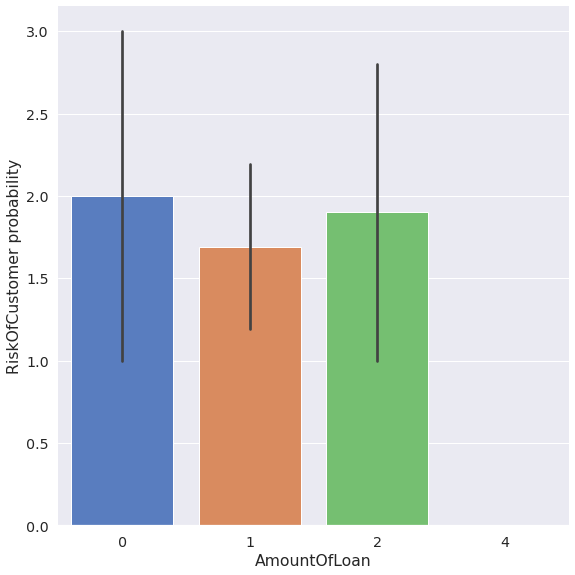

In [ ]:
# Explore AmountOfLoan feature vs RiskOfCustomer
g  = sns.factorplot(x="AmountOfLoan", y="RiskOfCustomer",data=dataset,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("RiskOfCustomer probability")

##2.4 Kiểm tra các giá trị khuyết thiếu

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STT             41 non-null     int64 
 1   Name            41 non-null     object
 2   RiskOfCustomer  41 non-null     int64 
 3   DebtStatus      41 non-null     int64 
 4   MonthlyIncome   41 non-null     int64 
 5   PropertyWorth   41 non-null     int64 
 6   DebtAtTime      41 non-null     int64 
 7   LoanTime        41 non-null     int64 
 8   CycleOfPayment  41 non-null     int64 
 9   Saving          41 non-null     int64 
 10  AmountOfLoan    41 non-null     int64 
 11  Age             41 non-null     int64 
 12  Educational     41 non-null     int64 
 13  WorkStatus      41 non-null     int64 
 14  YearOfWork      41 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 4.9+ KB


In [ ]:
dataset.head()

,STT,Name,RiskOfCustomer,DebtStatus,MonthlyIncome,PropertyWorth,DebtAtTime,LoanTime,CycleOfPayment,Saving,AmountOfLoan,Age,Educational,WorkStatus,YearOfWork
0,1,Bao Ngan,0,0,3,1,0,2,1,2,2,0,4,3,2
1,2,Nguyen Thanh Thai,2,0,2,2,0,2,2,4,1,0,1,2,0
2,3,Nguyen Quang Duc,4,0,3,2,0,1,1,4,1,1,1,3,1
3,4,Nguyen Van Huan,2,1,4,2,0,1,1,4,1,1,3,2,1
4,5,Hoang Nhu Quynh,3,2,2,0,0,3,2,3,2,0,1,1,2


#3 Mã hoá dữ liệu

In [ ]:
dataset = pd.get_dummies(dataset, columns = ["DebtStatus"], prefix="DebtStatus")
dataset = pd.get_dummies(dataset, columns = ["Age"], prefix="Age")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["DebtAtTime"], prefix="DebtAtTime")
dataset = pd.get_dummies(dataset, columns = ["LoanTime"], prefix="LoanTime")
dataset = pd.get_dummies(dataset, columns = ["CycleOfPayment"], prefix="CycleOfPayment")
dataset = pd.get_dummies(dataset, columns = ["Saving"], prefix="Saving")
dataset = pd.get_dummies(dataset, columns = ["AmountOfLoan"], prefix="AmountOfLoan")
dataset = pd.get_dummies(dataset, columns = ["Educational"], prefix="Educational")
dataset = pd.get_dummies(dataset, columns = ["WorkStatus"], prefix="WorkStatus")
dataset = pd.get_dummies(dataset, columns = ["YearOfWork"], prefix="YearOfWork")
dataset = pd.get_dummies(dataset, columns = ["PropertyWorth"], prefix="PropertyWorth")

In [ ]:
dataset.head()

,STT,Name,RiskOfCustomer,DebtStatus_0,DebtStatus_1,DebtStatus_2,DebtStatus_3,Age_0,Age_1,Age_3,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,DebtAtTime_0,DebtAtTime_1,DebtAtTime_2,DebtAtTime_3,DebtAtTime_4,LoanTime_0,LoanTime_1,LoanTime_2,LoanTime_3,LoanTime_4,CycleOfPayment_1,CycleOfPayment_2,CycleOfPayment_3,CycleOfPayment_4,Saving_1,Saving_2,Saving_3,Saving_4,AmountOfLoan_0,AmountOfLoan_1,AmountOfLoan_2,AmountOfLoan_4,Educational_0,Educational_1,Educational_2,Educational_3,Educational_4,WorkStatus_0,WorkStatus_1,WorkStatus_2,WorkStatus_3,WorkStatus_4,YearOfWork_0,YearOfWork_1,YearOfWork_2,YearOfWork_3,YearOfWork_4,PropertyWorth_0,PropertyWorth_1,PropertyWorth_2,PropertyWorth_3,PropertyWorth_4
0,1,Bao Ngan,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,2,Nguyen Thanh Thai,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,Nguyen Quang Duc,4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,4,Nguyen Van Huan,2,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,5,Hoang Nhu Quynh,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Dữ liệu được xử lý cuối cùng (số lượng bản ghi, số thuộc tính)
dataset.shape

(41, 56)

#4 Xây dựng mô hình chấm điểm tín dụng

##4.1 Đọc dữ liệu

In [ ]:
#Gán dữ liệu vào 2 tập train/test
Name = dataset.Name
dataset = dataset.drop(labels=["Name"], axis=1)
train = dataset[:train_len]
test = dataset[train_len:]

In [ ]:
dataset.head()

,STT,RiskOfCustomer,DebtStatus_0,DebtStatus_1,DebtStatus_2,DebtStatus_3,Age_0,Age_1,Age_3,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,DebtAtTime_0,DebtAtTime_1,DebtAtTime_2,DebtAtTime_3,DebtAtTime_4,LoanTime_0,LoanTime_1,LoanTime_2,LoanTime_3,LoanTime_4,CycleOfPayment_1,CycleOfPayment_2,CycleOfPayment_3,CycleOfPayment_4,Saving_1,Saving_2,Saving_3,Saving_4,AmountOfLoan_0,AmountOfLoan_1,AmountOfLoan_2,AmountOfLoan_4,Educational_0,Educational_1,Educational_2,Educational_3,Educational_4,WorkStatus_0,WorkStatus_1,WorkStatus_2,WorkStatus_3,WorkStatus_4,YearOfWork_0,YearOfWork_1,YearOfWork_2,YearOfWork_3,YearOfWork_4,PropertyWorth_0,PropertyWorth_1,PropertyWorth_2,PropertyWorth_3,PropertyWorth_4
0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,2,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,4,2,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,5,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Kiểm tra kích thước
test.shape

(15, 55)

In [ ]:
## Separate train features and label
train["RiskOfCustomer"] = train["RiskOfCustomer"].astype(int)
Y_train = train["RiskOfCustomer"]
X_train = train.drop(labels = ["RiskOfCustomer"],axis = 1)

In [ ]:
X_train.head()

,STT,DebtStatus_0,DebtStatus_1,DebtStatus_2,DebtStatus_3,Age_0,Age_1,Age_3,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,DebtAtTime_0,DebtAtTime_1,DebtAtTime_2,DebtAtTime_3,DebtAtTime_4,LoanTime_0,LoanTime_1,LoanTime_2,LoanTime_3,LoanTime_4,CycleOfPayment_1,CycleOfPayment_2,CycleOfPayment_3,CycleOfPayment_4,Saving_1,Saving_2,Saving_3,Saving_4,AmountOfLoan_0,AmountOfLoan_1,AmountOfLoan_2,AmountOfLoan_4,Educational_0,Educational_1,Educational_2,Educational_3,Educational_4,WorkStatus_0,WorkStatus_1,WorkStatus_2,WorkStatus_3,WorkStatus_4,YearOfWork_0,YearOfWork_1,YearOfWork_2,YearOfWork_3,YearOfWork_4,PropertyWorth_0,PropertyWorth_1,PropertyWorth_2,PropertyWorth_3,PropertyWorth_4
0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,5,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


##4.2 Xây dựng mô hình

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

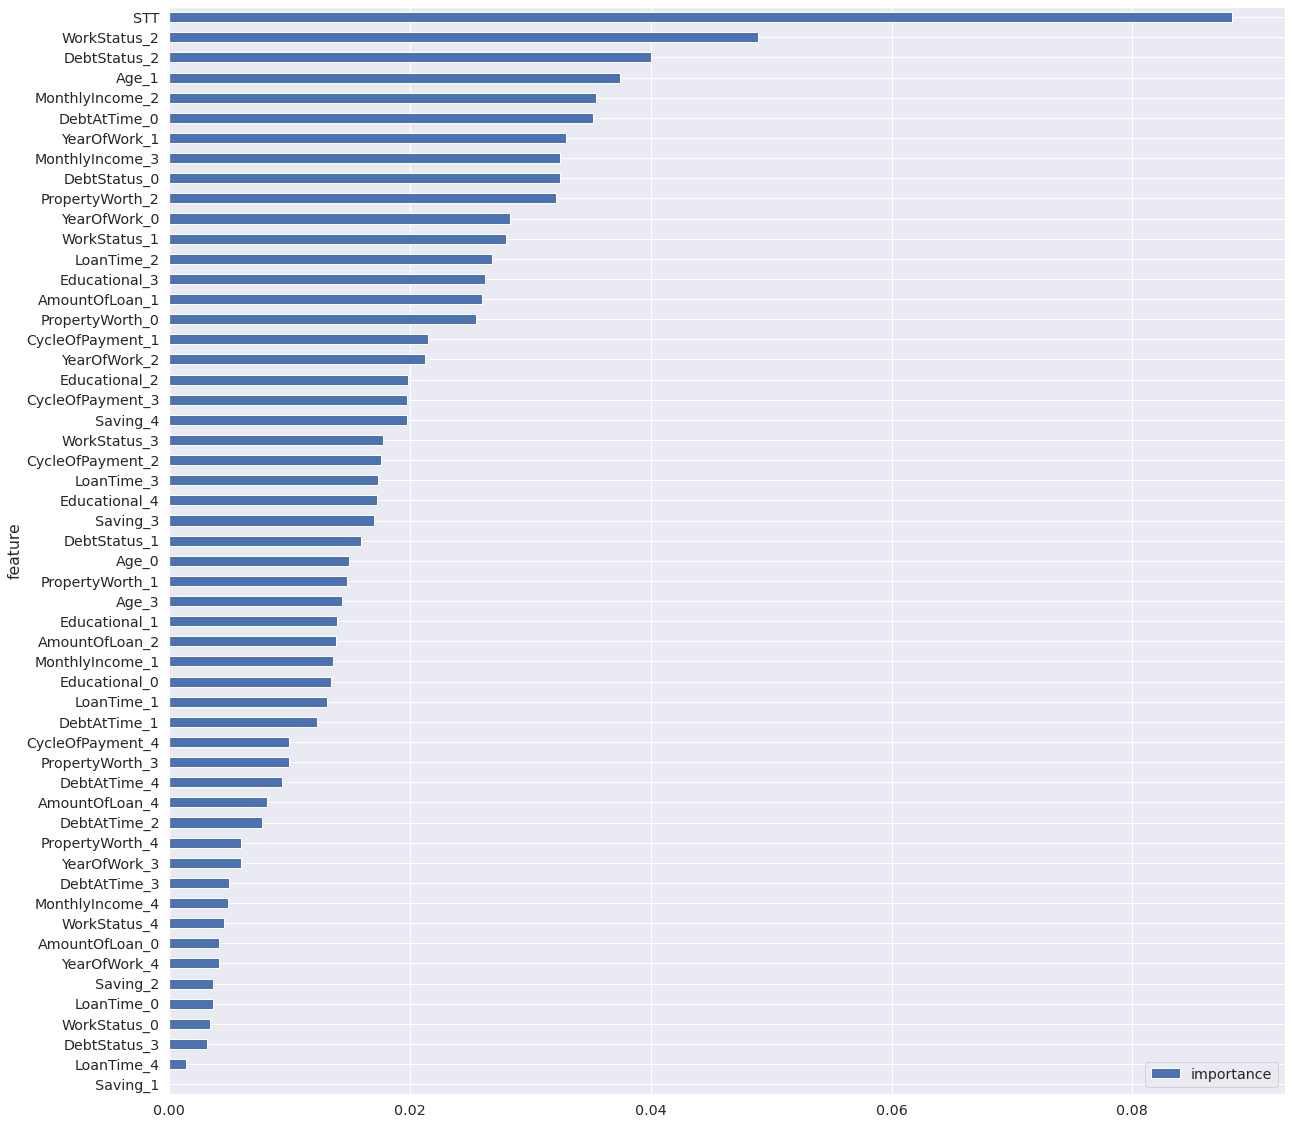

In [ ]:
features.plot(kind='barh', figsize=(20, 20))

###4.2.1 Huấn luyện mô hình

In [ ]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
#Thực thi mô hình với các tham số
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
test.head()

,STT,RiskOfCustomer,DebtStatus_0,DebtStatus_1,DebtStatus_2,DebtStatus_3,Age_0,Age_1,Age_3,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,DebtAtTime_0,DebtAtTime_1,DebtAtTime_2,DebtAtTime_3,DebtAtTime_4,LoanTime_0,LoanTime_1,LoanTime_2,LoanTime_3,LoanTime_4,CycleOfPayment_1,CycleOfPayment_2,CycleOfPayment_3,CycleOfPayment_4,Saving_1,Saving_2,Saving_3,Saving_4,AmountOfLoan_0,AmountOfLoan_1,AmountOfLoan_2,AmountOfLoan_4,Educational_0,Educational_1,Educational_2,Educational_3,Educational_4,WorkStatus_0,WorkStatus_1,WorkStatus_2,WorkStatus_3,WorkStatus_4,YearOfWork_0,YearOfWork_1,YearOfWork_2,YearOfWork_3,YearOfWork_4,PropertyWorth_0,PropertyWorth_1,PropertyWorth_2,PropertyWorth_3,PropertyWorth_4
26,1,4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
27,2,2,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
28,3,3,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
29,4,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
30,5,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


###4.2.2 Thử nghiệm mô hình

In [ ]:
results = pd.read_csv("Tuân/My Drive/Code Python/test.csv")

In [ ]:
DefaultProba = model.predict_proba(test.drop(["STT"], axis=1))
DefaultProba = DefaultProba[:,1]
results.RiskOfCustomer = DefaultProba
result = results.rename(columns={'STT': 'ID',
                                 'RiskOfCustomer': 'Probability'})

##4.3 Báo cáo kết quả

In [ ]:
result.head()

,ID,Name,Probability,DebtStatus,MonthlyIncome,PropertyWorth,DebtAtTime,LoanTime,CycleOfPayment,Saving,AmountOfLoan,Age,Educational,WorkStatus,YearOfWork
0,1,Tran Thanh Thai,0.194,0,15,600,0,20,6,400,500,30,4,3,2
1,2,Nguyen Xuan Toan,0.143,2,14,700,10,12,6,200,600,24,1,1,3
2,3,Bui Thi Nguyet,0.348,2,20,200,0,24,12,300,100,25,2,3,1
3,4,Nguyen Van Huan,0.204,0,22,340,0,12,6,100,200,22,4,2,2
4,5,Nguyen Nhu Quynh,0.290,0,23,500,20,36,12,200,400,23,2,3,1


In [ ]:
#Lưu kết quả ra file
results.to_csv("Tuân/My Drive/Code Python/Credit_score_result.csv", index=False)

In [ ]:
# Vẽ biểu đồ với kết quả như sau:
in range(0.95,0.99)
-> AAA
in range(0.9,0.95)
-> AA
in range(0.85, 0.89)
-> A
in range(0.8, 0.85)
-> BBB
in range(0.75, 0.8)
-> BB
in range(0.7, 0.85)
-> B
in range(0.6, 0.7)
-> CCC
in range(0.5, 0.6)
-> CC
in range(0.4, 0.49)
-> C
in range(0, 0,4)
-> D

SyntaxError: ignored